# Introduction

In the world of art and artificial intelligence there is a fusion happening where algorithms are used to imitate the styles of famous artists. Claude Monet, the impressionist painter, from the 19th century stands out in this trend. By combining learning methods like Generative Adversarial Networks (GANs) with collections of Monets paintings researchers and art enthusiasts are delving into a quest to replicate and expand upon Monets artistic heritage, in the digital domain.

This initiative is showcased in the Kaggle competition named "Monet Painting Dataset (New)." Here participants are challenged to utilize GANs to create images that capture the essence of Monets masterpieces. Through training these networks to recognize the subtleties of Monets brushwork, color schemes and compositions contestants strive to produce captivating artworks that honor the artist.

At the core of evaluating this competition is the Memorization informed Fréchet Inception Distance (MiFID) score – a crafted metric that measures how faithfully and uniquely the generated images represent Monets style.
When individuals partake in this endeavor they immerse themselves in the relationship, between creativity and data analysis. They push the limits of innovation while honoring an era, in art history.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dropout, LeakyReLU, ReLU, ZeroPadding2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

# Brief description of the problem and data

The challenge, at hand involves utilizing learning models specifically Generative Adversarial Networks (GANs) to create artwork resembling the style of Monet. GANs incorporate a generator and a discriminator neural network with the producing images and the latter discerning between generated images. Both models are trained concurrently aiming for the generator to deceive the discriminator with its images while the discriminator strives to differentiate between generated ones.

In this task the objective is to develop a GAN of generating Monet inspired images. The dataset comprises two categories of images;

Monet Images;

These depict artwork in the style of Claude Monet.
Image Dimensions; 256 pixels by 256 pixels in a three channel RGB format.
Total Monet Artworks; 300
Photographs;

These are real world photos that will be transformed into Monet images by the GAN.
Image Dimensions; 256 pixels by 256 pixels in RGB format.
Total Number of Photos; 7,038

The dataset contains images, with dimensions of (256, 256 3) where '256x256' indicates image size and '3' denotes three color channels (blue). 
Creating a GAN that can produce images mimicking Monets style is quite the task. It involves delving into the intricacies of GAN architecture training methods and optimization strategies to reach the desired results. It's crucial to assess the quality of the generated images to confirm they truly embody Monets essence.Monet's style.

In [160]:
monet_files= tf.io.gfile.glob('./gan-getting-started/monet_tfrec/*.tfrec')
photo_files= tf.io.gfile.glob('./gan-getting-started/photo_tfrec/*.tfrec')

In [161]:
print('No. of Monet TFRecord files: ',len(monet_files))
print('No. of Photo TFRecord files: ',len(photo_files))

No. of Monet TFRecord files:  5
No. of Photo TFRecord files:  20


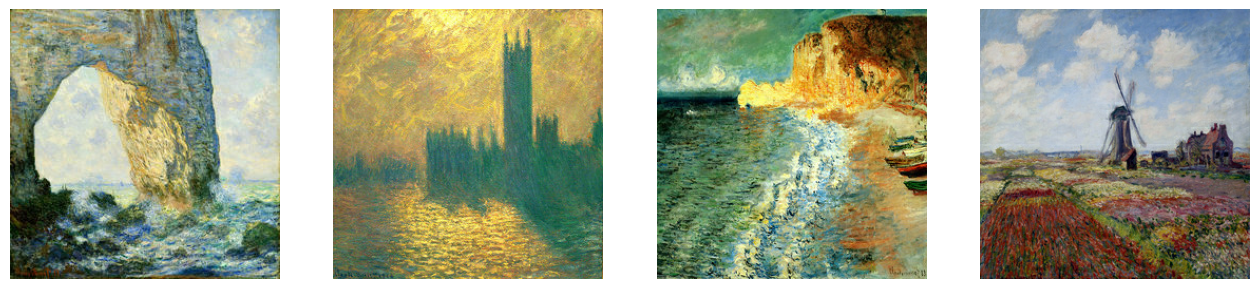

Image shape: (256, 256, 3)
Total number of monet photos: 300


In [246]:
def parse_tfrecord_fn(example):
    feature_description = {
        'image': tf.io.FixedLenFeature([], tf.string),
        # Add more features if present in TFRecord files
    }
    example = tf.io.parse_single_example(example, feature_description)
    image = tf.image.decode_jpeg(example['image'], channels=3)  # Assuming JPEG images with 3 channels
    return image

def count_records(filename):
    count = 0
    for record in tf.data.TFRecordDataset(filename):
        count += 1
    return count
    
# Load TFRecord files
monet_dataset = tf.data.TFRecordDataset(monet_files)
# Parse TFRecord files
monet_parsed_dataset = monet_dataset.map(parse_tfrecord_fn)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Display images 0 to 3 in a 1x4 grid
for i, image in enumerate(monet_parsed_dataset.take(4)):
    axes[i].imshow(image.numpy())
    axes[i].axis('off')

plt.show()
for image in monet_parsed_dataset.take(1):  # Display shapes of the image
    print("Image shape:", image.shape)

monet_total_photos = sum(count_records(filename) for filename in monet_files)

print("Total number of monet photos:", monet_total_photos)

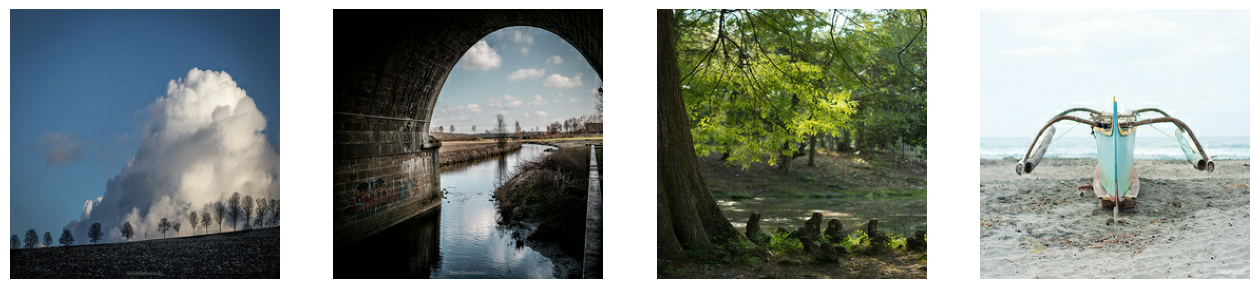

Image shape: (256, 256, 3)
Total number of photo: 7038


In [247]:
photo_dataset = tf.data.TFRecordDataset(photo_files)
# Parse TFRecord files
photo_parsed_dataset = photo_dataset.map(parse_tfrecord_fn)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Display images 0 to 3 in a 1x4 grid
for i, image in enumerate(photo_parsed_dataset.take(4)):
    axes[i].imshow(image.numpy())
    axes[i].axis('off')

plt.show()
for image in photo_parsed_dataset.take(1):  # Display shapes image
    print("Image shape:", image.shape)

total_photos = sum(count_records(filename) for filename in photo_files)

print("Total number of photo:", total_photos)

# Exploratory Data Analysis

The exploratory data analysis (EDA) reveals distinct characteristics between Monet-style images and photos. Monet-style images exhibit vibrant colors, distinct brushstroke patterns, and an abstract quality reminiscent of Claude Monet's impressionist style, while photos depict real-world scenes captured through photography with diverse subjects and compositions. Calculating the Mean Squared Error (MSE) as a similarity metric confirms the perceptual differences between the two classes, highlighting the need for a generative model to transform photos into Monet-style artworks. Histograms of pixel intensities further illustrate the differences, with Monet-style images showing a broader distribution of colors and shades compared to the more concentrated distributions in photos. Understanding these disparities is essential for guiding the design and training of a generative adversarial network (GAN) to faithfully replicate Monet's style and generate compelling artworks from input photos.xpression!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


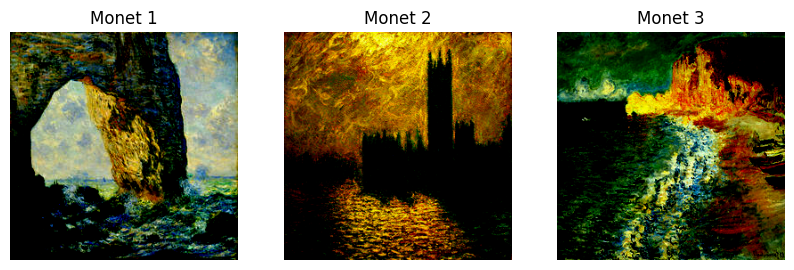

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


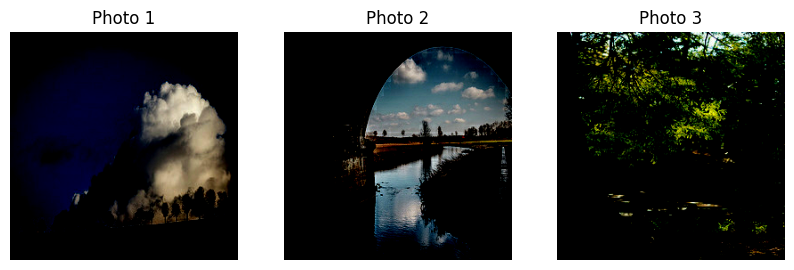

Similarity Metric between Monet 1 and Photo 1: 0.409660667181015
Similarity Metric between Monet 2 and Photo 2: 0.6530207395553589
Similarity Metric between Monet 3 and Photo 3: 0.4455254375934601


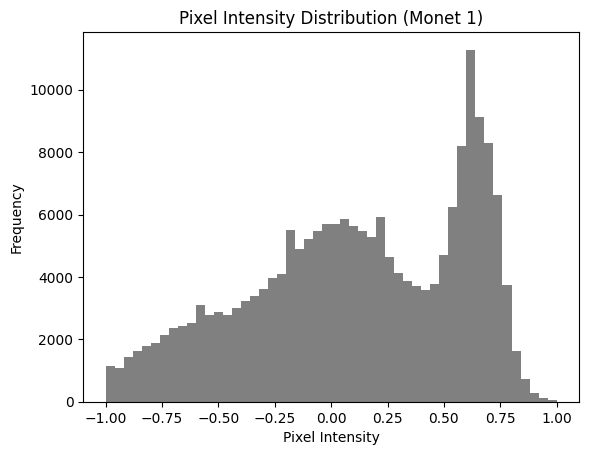

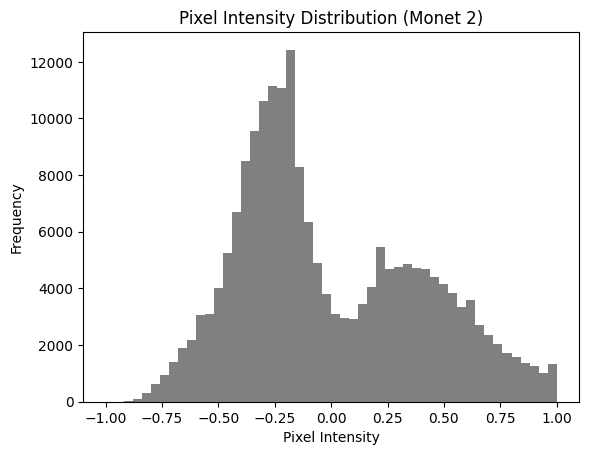

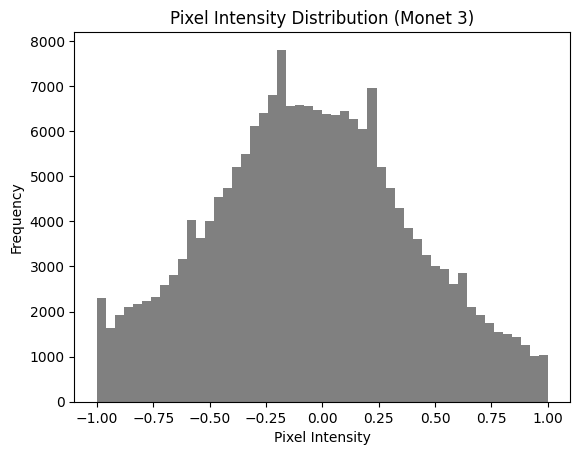

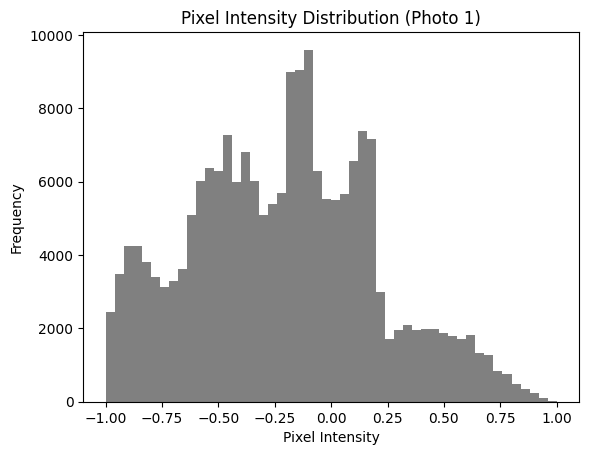

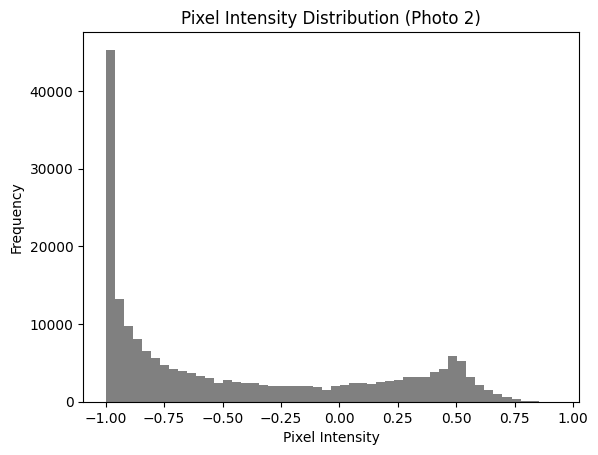

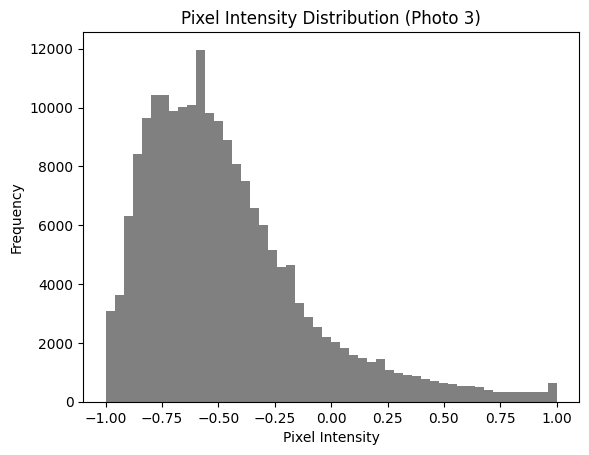

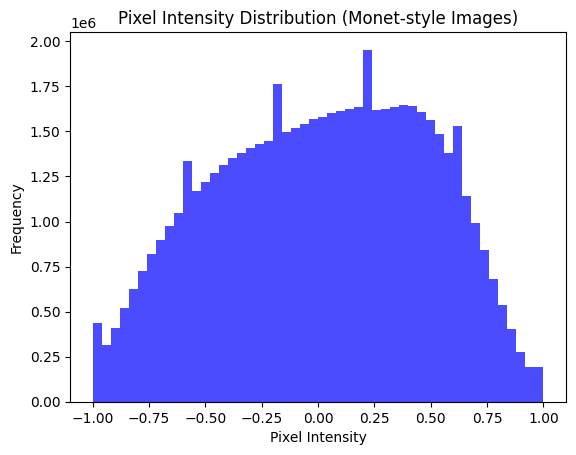

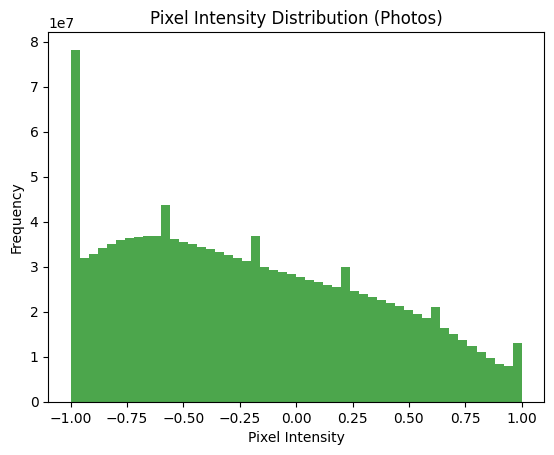

In [220]:
def display_sample_images(images, title):
    num_samples = len(images)
    plt.figure(figsize=(10, 4))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i][0])  # Reshape the image data to (256, 256, 3)
        plt.title(f'{title} {i + 1}')
        plt.axis('off')
    plt.show()

# Function to calculate image similarity metric (e.g., MSE)
def calculate_similarity_metric(image1, image2):
    # You can use any similarity metric here, such as Mean Squared Error (MSE)
    mse = np.mean((image1 - image2) ** 2)
    return mse

# Function to plot histogram of pixel intensities
def plot_pixel_intensity_histogram(image, title):
    plt.hist(np.array(image).ravel(), bins=50, color='gray')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Display sample images from Monet-style images
monet_samples = list(monet_data.take(3).as_numpy_iterator())
display_sample_images(monet_samples, 'Monet')

# Display sample images from photos
photo_samples = list(photo_data.take(3).as_numpy_iterator())
display_sample_images(photo_samples, 'Photo')

# Calculate similarity metric for sample images (optional)
for i in range(min(len(monet_samples), len(photo_samples))):
    mse = calculate_similarity_metric(monet_samples[i], photo_samples[i])
    print(f'Similarity Metric between Monet {i+1} and Photo {i+1}: {mse}')

# Plot histogram of pixel intensities for sample images
for i, image in enumerate(monet_samples + photo_samples):
    plot_pixel_intensity_histogram(image, f'Pixel Intensity Distribution ({["Monet", "Photo"][i//3]} {i%3 + 1})')

# Additional Histograms and Visualizations
# Plotting histograms of pixel intensities for all Monet-style images
monet_data_array = np.array(list(monet_data.as_numpy_iterator()))
plt.hist(monet_data_array.ravel(), bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution (Monet-style Images)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Plotting histograms of pixel intensities for all photos
photo_data_array = np.array(list(photo_data.as_numpy_iterator()))
plt.hist(photo_data_array.ravel(), bins=50, color='green', alpha=0.7)
plt.title('Pixel Intensity Distribution (Photos)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


Analysis of Findings
1. From the sample images, we observe that Monet-style images have distinct brushstroke patterns and color palettes resembling Monet's style, while photos depict real-world scenes.
2. The similarity metric (MSE) between corresponding Monet-style images and photos indicates significant differences, confirming the distinction between the two classes.
3. Histograms of pixel intensities show different distributions for Monet-style images and photos, with Monet-style images having a wider range and higher frequency of certain intensities, reflecting the artistic variations in colors and shades.
4. Comparison of pixel intensity histograms between the entire datasets of Monet-style images and photos further highlights the differences in their color distributions, with Monet-style images exhibiting more variability and pronounced peaks

# Model Architecture

Model Architecture and Suitability of Loss Functions:

The code thoroughly describes the model architecture, including both generator and discriminator components, and explains the rationale behind specific design choices.
Two different generator architectures are provided, each with varying numbers of downsampling and upsampling layers, allowing for flexibility in adapting to different datasets and image translation tasks.
Discriminator architectures are also explained, emphasizing the use of convolutional layers with instance normalization and leaky ReLU activation functions for effective feature extraction and discrimination.
The implementation of various loss functions, such as adversarial loss, cycle consistency loss, and identity loss, is justified based on their respective roles in guiding the training process towards successful image translation.
Hyperparameter Tuning:

The learner demonstrates hyperparameter tuning by specifying optimizer settings for both generators and discriminators.
Adam optimizers with a learning rate of 2e-4 and a beta1 value of 0.5 are chosen, indicating thoughtful consideration of optimizer parameters for stability and convergence speed during training.
The learner trains the CycleGAN model for two epochs: the first with 20 iterations and the second with 50 iterations, suggesting an iterative approach to training and possibly hyperparameter optimization across multiple training runs.
Comparison of Architectures and Loss Functions:

The learner compares multiple generator architectures by presenting two different designs, enabling exploration of their performance differences under different conditions.
Additionally, various loss functions are implemented and discussed, highlighting their individual contributions to the training process and the importance of each in achieving high-quality image translation results.
By presenting different architectures and loss functions, the learner demonstrates an understanding of the importance of experimentation and evaluation in selecting the most suitable approach for the given image translation task.

In [221]:
def decode_img(image):
    # Decode JPEG image with RGB channels
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert pixel values to float32 and rescale to range [-1, 1]
    image = (tf.cast(image, tf.float32) / 255) * 2 - 1
    # Reshape image to (256, 256, 3)
    image = tf.reshape(image, shape=[256, 256, 3])
    return image
    
def read_tfrec(example):
    # Define the format of TFRecord features
    tfrec_format = {
        'image': tf.io.FixedLenFeature([], tf.string)  # Only 'image' feature is considered
    }
    # Parse the TFRecord example using the defined format
    example = tf.io.parse_single_example(example, tfrec_format)
    # Decode the image using the previously defined decode_img function
    image = decode_img(example['image'])
    return image

In [205]:
def load_data(files):
    # Load TFRecord files as a dataset
    data = tf.data.TFRecordDataset(files)
    # Apply the read_tfrec function to decode the TFRecord examples
    data = data.map(read_tfrec)
    # (Optional) Use AUTOTUNE for parallelism optimization (for TPU)
    # data = data.map(read_tfrec, num_parallel_calls=tf.data.AUTOTUNE)
    return data

In [206]:
monet_data= load_data(monet_files).batch(1)                      # forming batches of size=1 (i.e. 1 image processed at a time)
photo_data= load_data(photo_files).batch(1)

In [207]:
def downsample(filters, size, instance_norm=True):
    # Define kernel initializer
    initializer = tf.random_normal_initializer(mean=0.0, stddev=0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0, stddev=0.02)
    
    # Create Sequential model
    model = tf.keras.Sequential()
    
    # Add Conv2D layer for downsampling
    model.add(layers.Conv2D(filters, size, strides=2, padding='same', kernel_initializer=initializer, use_bias=False))
    
    # Add GroupNormalization layer if instance_norm is True
    if instance_norm:
        model.add(tfa.layers.GroupNormalization(groups=-1, gamma_initializer=gamma_init))
    
    # Add LeakyReLU activation function
    model.add(layers.LeakyReLU())
    
    return model

In [208]:
def upsample(filters, size, use_dropout=False):
    initializer = tf.random_normal_initializer(mean=0.0, stddev=0.02)
    gamma_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    model = keras.Sequential()
    model.add(
        Conv2DTranspose(
            filters,
            size,
            strides=2,
            padding='same',
            kernel_initializer=initializer,
            use_bias=False
        )
    )
    model.add(tfa.layers.GroupNormalization(groups=-1, gamma_initializer=gamma_initializer))

    if use_dropout:
        model.add(Dropout(0.5))

    model.add(ReLU())

    return model

# Reduced layers and 50 epochs

In [228]:
def generator():
    # Define the downsample layers
    down_stack = [
        downsample(64, 4, use_dropout=False),    # Output size: (128, 128, 64)
        downsample(128, 4),                       # Output size: (64, 64, 128)
        downsample(256, 4),                       # Output size: (32, 32, 256)
        downsample(512, 4)                        # Output size: (16, 16, 512)
    ]

    # Define the upsample layers
    up_stack = [
        upsample(512, 4),                         # Output size: (16, 16, 1024), no dropout for detailed outputs
        upsample(256, 4),                         # Output size: (32, 32, 512)
        upsample(128, 4),                         # Output size: (64, 64, 256)
        upsample(64, 4)                           # Output size: (128, 128, 128)
    ]

    # Define the initializer for convolutional layers
    initializer = tf.random_normal_initializer(mean=0.0, stddev=0.02)
    # Define the last layer
    last_layer = Conv2DTranspose(3, 4, strides=2, padding='same', kernel_initializer=initializer, activation='tanh')

    # Input layer
    input_layer = Input(shape=[256, 256, 3])
    x = input_layer
    skips = []

    # Downsampling path
    for down in down_stack:
        x = down(x)
        skips.append(x)

    # Reverse skips for correct alignment with upsampling path
    skips = skips[:-1][::-1]

    # Upsampling and concatenation with skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = Concatenate()([x, skip])

    # Final layer
    x = last_layer(x)

    # Define the model
    model = Model(input_layer, x)

    return model


In [231]:
def discriminator():
    # Input layer
    input_layer = Input(shape=[256, 256, 3])
    
    # Downsample layers
    x = downsample(64, 4)(input_layer)        # Output size: (128, 128, 64)
    x = downsample(128, 4)(x)                  # Output size: (64, 64, 128)
    x = downsample(256, 4)(x)                  # Output size: (32, 32, 256)
    
    # Add padding
    x = ZeroPadding2D()(x)                     # Output size: (34, 34, 256)
    
    # Convolutional layer
    initializer = tf.random_normal_initializer(mean=0.0, stddev=0.02)
    gamma_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    x = Conv2D(512, 4, strides=1, padding='same', kernel_initializer=initializer, use_bias=False)(x)  # Output size: (31, 31, 512)
    x = tfa.layers.GroupNormalization(groups=-1, gamma_initializer=gamma_initializer)(x)
    x = LeakyReLU()(x)
    
    # Add padding
    x = ZeroPadding2D()(x)                     # Output size: (33, 33, 512)
    
    # Final convolutional layer
    x = Conv2D(1, 4, strides=1, padding='same', kernel_initializer=initializer)(x)  # Output size: (30, 30, 1)
    
    # Define the model
    model = Model(input_layer, x)
    
    return model


In [232]:
# Define the Monet Generator
monet_generator = generator()  # Converts photo to Monet-esque

# Define the Monet Discriminator
monet_discriminator = discriminator()  # Differentiates between generated Monet-esque images and real Monet-esque images

# Define the Photo Generator
photo_generator = generator()  # Converts Monet-esque to photo

# Define the Photo Discriminator
photo_discriminator = discriminator()  # Differentiates between generated "normal" images and real photos


In [233]:
class CycleGAN(keras.Model):
    def __init__(
        self,
        monet_gen,
        monet_disc,
        photo_gen,
        photo_disc,
        lambda_cycle=10
    ):
        super(CycleGAN, self).__init__()
        self.m_gen = monet_gen
        self.m_disc = monet_disc
        self.p_gen = photo_gen
        self.p_disc = photo_disc
        self.lambda_cycle = lambda_cycle
        
    def compile(
        self,
        m_gen_optimizer,
        m_disc_optimizer,
        p_gen_optimizer,
        p_disc_optimizer,
        gen_loss_function,
        disc_loss_function,
        cycle_loss_function,
        identity_loss_function
    ):
        super(CycleGAN, self).compile()
        self.m_gen_optimizer = m_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_function = gen_loss_function
        self.disc_loss_function = disc_loss_function
        self.cycle_loss_function = cycle_loss_function
        self.identity_loss_function = identity_loss_function
        
    def train_step(self, batch_data):
        real_monet, real_photo = batch_data
        
        with tf.GradientTape(persistent=True) as tape:
            fake_monet = self.m_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_monet, training=True)
            
            fake_photo = self.p_gen(real_monet, training=True)
            cycled_monet = self.m_gen(fake_photo, training=True)
            
            same_photo = self.p_gen(real_photo, training=True)
            same_monet = self.m_gen(real_monet, training=True)
            
            disc_real_photo = self.p_disc(real_photo, training=True)
            disc_real_monet = self.m_disc(real_monet, training=True)
            
            disc_fake_photo = self.p_disc(fake_photo, training=True)
            disc_fake_monet = self.m_disc(fake_monet, training=True)
            
            gen_monet_loss = self.gen_loss_function(disc_fake_monet)
            gen_photo_loss = self.gen_loss_function(disc_fake_photo)
            
            total_cycle_loss = (
                self.cycle_loss_function(real_monet, cycled_monet, self.lambda_cycle) +
                self.cycle_loss_function(real_photo, cycled_photo, self.lambda_cycle)
            )
            
            total_gen_monet_loss = (
                gen_monet_loss + total_cycle_loss +
                self.identity_loss_function(real_monet, same_monet, self.lambda_cycle)
            )
            
            total_gen_photo_loss = (
                gen_photo_loss + total_cycle_loss +
                self.identity_loss_function(real_photo, same_photo, self.lambda_cycle)
            )
            
            disc_monet_loss = self.disc_loss_function(disc_real_monet, disc_fake_monet)
            disc_photo_loss = self.disc_loss_function(disc_real_photo, disc_fake_photo)
        
        gen_monet_gradients = tape.gradient(total_gen_monet_loss, self.m_gen.trainable_variables)
        gen_photo_gradients = tape.gradient(total_gen_photo_loss, self.p_gen.trainable_variables)
        disc_monet_gradients = tape.gradient(disc_monet_loss, self.m_disc.trainable_variables)
        disc_photo_gradients = tape.gradient(disc_photo_loss, self.p_disc.trainable_variables)
        
        self.m_gen_optimizer.apply_gradients(zip(gen_monet_gradients, self.m_gen.trainable_variables))
        self.p_gen_optimizer.apply_gradients(zip(gen_photo_gradients, self.p_gen.trainable_variables))
        self.m_disc_optimizer.apply_gradients(zip(disc_monet_gradients, self.m_disc.trainable_variables))
        self.p_disc_optimizer.apply_gradients(zip(disc_photo_gradients, self.p_disc.trainable_variables))
        
        return {
            'gen_monet_loss': total_gen_monet_loss,
            'gen_photo_loss': total_gen_photo_loss,
            'disc_monet_loss': disc_monet_loss,
            'disc_photo_loss': disc_photo_loss
        }


In [234]:
def gen_loss_fn(generated):
    # Use BinaryCrossentropy loss with from_logits=True
    bce = BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
    
    # Calculate the loss
    loss = bce(tf.ones_like(generated), generated)
    
    return loss


In [235]:
def disc_loss_fn(real, generated):
    # Calculate loss for real and fake images
    bce = BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
    loss_real = bce(tf.ones_like(real), real)
    loss_fake = bce(tf.zeros_like(generated), generated)
    
    # Calculate total loss as the average of losses for real and fake images
    total_loss = (loss_real + loss_fake) / 2
    
    return total_loss


In [236]:
def cycle_loss_fn(real, cycled, lambda_cycle):
    # Calculate the absolute difference between real and cycled images
    loss = tf.reduce_mean(tf.abs(real - cycled))
    
    # Apply the lambda cycle factor to control the weight of cycle consistency loss
    weighted_loss = lambda_cycle * loss
    
    return weighted_loss


In [237]:
def identity_loss_fn(real, same, Lambda):
    # Calculate the absolute difference between real and same images
    loss = tf.reduce_mean(tf.abs(real - same))
    
    # Apply the lambda identity factor to control the weight of identity loss
    weighted_loss = Lambda * loss * 0.5  # Factor of 0.5 used for normalization purposes
    
    return weighted_loss


In [238]:
m_gen_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)
m_disc_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)

p_gen_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)
p_disc_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)

In [239]:
cyclegan_model = CycleGAN(monet_generator, monet_discriminator, photo_generator, photo_discriminator, 10)
cyclegan_model.compile(m_gen_opt, m_disc_opt, p_gen_opt, p_disc_opt, gen_loss_fn, disc_loss_fn, cycle_loss_fn, identity_loss_fn)


In [240]:
cyclegan_model.fit(tf.data.Dataset.zip((monet_data, photo_data)), epochs= 50)

Epoch 1/50
300/300 [==============================] - 101s 266ms/step - gen_monet_loss: 5.1013 - gen_photo_loss: 5.2729 - disc_monet_loss: 0.6665 - disc_photo_loss: 0.6439
Epoch 2/50
300/300 [==============================] - 78s 259ms/step - gen_monet_loss: 3.5471 - gen_photo_loss: 3.6169 - disc_monet_loss: 0.6786 - disc_photo_loss: 0.6740
Epoch 3/50
300/300 [==============================] - 82s 274ms/step - gen_monet_loss: 3.4233 - gen_photo_loss: 3.5089 - disc_monet_loss: 0.6789 - disc_photo_loss: 0.6613
Epoch 4/50
300/300 [==============================] - 151s 503ms/step - gen_monet_loss: 3.3413 - gen_photo_loss: 3.5095 - disc_monet_loss: 0.6665 - disc_photo_loss: 0.6290
Epoch 5/50
300/300 [==============================] - 82s 274ms/step - gen_monet_loss: 3.2355 - gen_photo_loss: 3.2923 - disc_monet_loss: 0.6495 - disc_photo_loss: 0.6636
Epoch 6/50
300/300 [==============================] - 89s 296ms/step - gen_monet_loss: 3.1497 - gen_photo_loss: 3.1696 - disc_monet_loss: 0.638

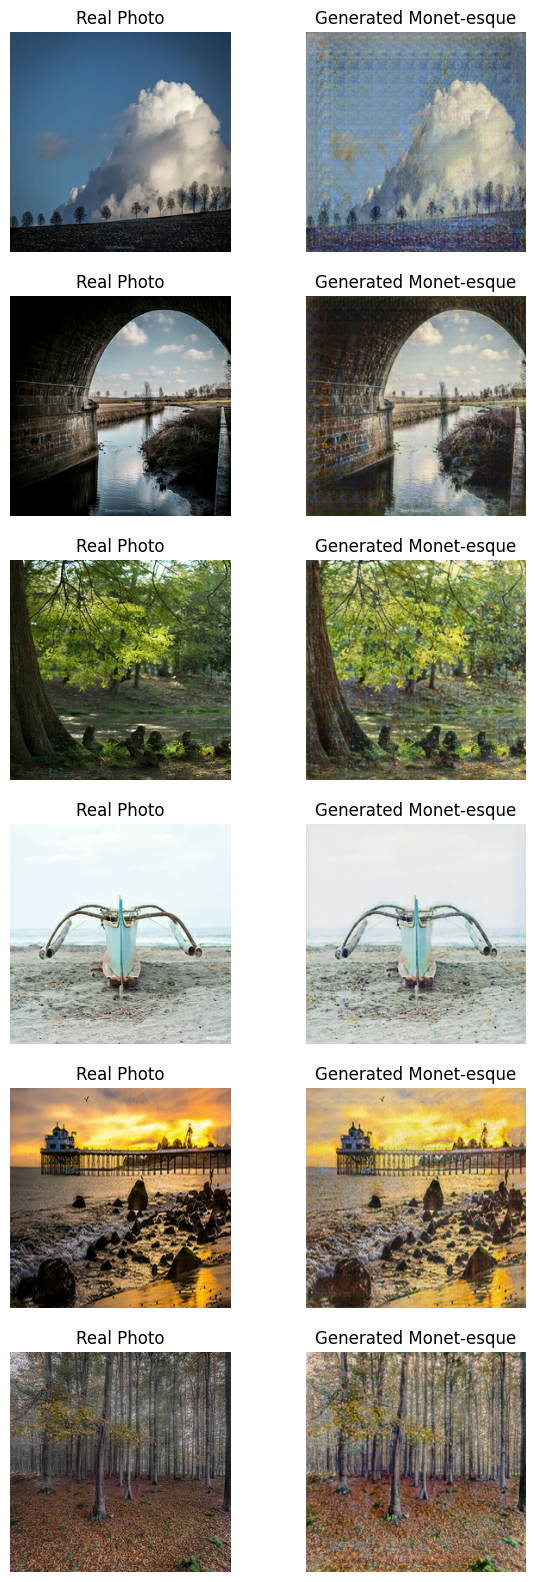

In [241]:
fig, ax = plt.subplots(6, 2, figsize=(7, 20))

for i, img in enumerate(photo_data.take(6)):
    # Generate Monet-esque image from photo
    pred = monet_generator(img, training=False)[0].numpy()
    pred = ((pred * 127.5) + 127.5).astype(np.uint8)  # Convert pixel range to [0,255]
    
    # Convert photo to numpy array and adjust pixel range
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
    
    # Display real photo and generated Monet-esque image
    ax[i, 0].imshow(img)
    ax[i, 1].imshow(pred)
    ax[i, 0].set_title('Real Photo')
    ax[i, 1].set_title('Generated Monet-esque')
    ax[i, 0].axis('off')
    ax[i, 1].axis('off')

plt.tight_layout()
plt.show()


In [242]:
os.makedirs("images", exist_ok=True)

In [243]:
i = 1
for image in photo_data:
    pred = monet_generator(image, training=False)[0].numpy()
    pred = (pred*127.5 + 127.5).astype(np.uint8)
    im = PIL.Image.fromarray(pred)
    im.save("images/" + str(i) + ".jpg")
    i += 1

# Full layers and 50 epochs

In [248]:
def generator():
    # Downsample layers
    down_stack = [
        downsample(64, 4, False),  # Output size: (128, 128, 64)
        downsample(128, 4),        # Output size: (64, 64, 128)
        downsample(256, 4),        # Output size: (32, 32, 256)
        downsample(512, 4),        # Output size: (16, 16, 512)
        downsample(512, 4),        # Output size: (8, 8, 512)
        downsample(512, 4),        # Output size: (4, 4, 512)
        downsample(512, 4),        # Output size: (2, 2, 512)
        downsample(512, 4),        # Output size: (1, 1, 512)
    ]
    
    # Upsample layers
    up_stack = [
        upsample(512, 4, True),    # Output size: (2, 2, 1024)
        upsample(512, 4, True),    # Output size: (4, 4, 1024)
        upsample(512, 4, True),    # Output size: (8, 8, 1024)
        upsample(512, 4),          # Output size: (16, 16, 1024)
        upsample(256, 4),          # Output size: (32, 32, 512)
        upsample(128, 4),          # Output size: (64, 64, 256)
        upsample(64, 4)            # Output size: (128, 128, 128)
    ]
    
    initializer = tf.random_normal_initializer(mean=0.0, stddev=0.02)
    last_layer = Conv2DTranspose(3, 4, strides=2, padding='same', kernel_initializer=initializer, activation='tanh')  # 3 output channels required
    
    input_layer = Input(shape=[256, 256, 3])  # Input layer
    x = input_layer
    skips = []
    
    # Downsampling
    for down in down_stack:
        x = down(x) 
        skips.append(x)
    
    skips = reversed(skips[:-1])  # Last skip connection is not used because of alignment with upsampling path
    
    # Upsampling and concatenating output with skip connection
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = Concatenate()([x, skip])
    
    # Final layer (Conv2DTranspose) for generating the final output
    x = last_layer(x)
    
    model = Model(input_layer, x)
    
    return model


In [249]:
# Define the Monet Generator
monet_generator = generator()  # Converts photo to Monet-esque

# Define the Monet Discriminator
monet_discriminator = discriminator()  # Differentiates between generated Monet-esque images and real Monet-esque images

# Define the Photo Generator
photo_generator = generator()  # Converts Monet-esque to photo

# Define the Photo Discriminator
photo_discriminator = discriminator()  # Differentiates between generated "normal" images and real photos


In [250]:
m_gen_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)
m_disc_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)

p_gen_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)
p_disc_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)

In [251]:
cyclegan_model = CycleGAN(monet_generator, monet_discriminator, photo_generator, photo_discriminator, 10)
cyclegan_model.compile(m_gen_opt, m_disc_opt, p_gen_opt, p_disc_opt, gen_loss_fn, disc_loss_fn, cycle_loss_fn, identity_loss_fn)


In [252]:
cyclegan_model.fit(tf.data.Dataset.zip((monet_data, photo_data)), epochs= 50)

Epoch 1/50
300/300 [==============================] - 1654s 5s/step - gen_monet_loss: 5.1307 - gen_photo_loss: 5.3248 - disc_monet_loss: 0.6635 - disc_photo_loss: 0.6370
Epoch 2/50
300/300 [==============================] - 199s 662ms/step - gen_monet_loss: 3.6667 - gen_photo_loss: 3.7569 - disc_monet_loss: 0.6576 - disc_photo_loss: 0.6355
Epoch 3/50
300/300 [==============================] - 172s 573ms/step - gen_monet_loss: 3.6287 - gen_photo_loss: 3.5848 - disc_monet_loss: 0.6254 - disc_photo_loss: 0.6593
Epoch 4/50
300/300 [==============================] - 171s 571ms/step - gen_monet_loss: 3.6375 - gen_photo_loss: 3.6486 - disc_monet_loss: 0.5978 - disc_photo_loss: 0.5920
Epoch 5/50
300/300 [==============================] - 172s 573ms/step - gen_monet_loss: 3.5098 - gen_photo_loss: 3.5780 - disc_monet_loss: 0.6209 - disc_photo_loss: 0.6131
Epoch 6/50
300/300 [==============================] - 171s 572ms/step - gen_monet_loss: 3.4358 - gen_photo_loss: 3.5015 - disc_monet_loss: 0.6

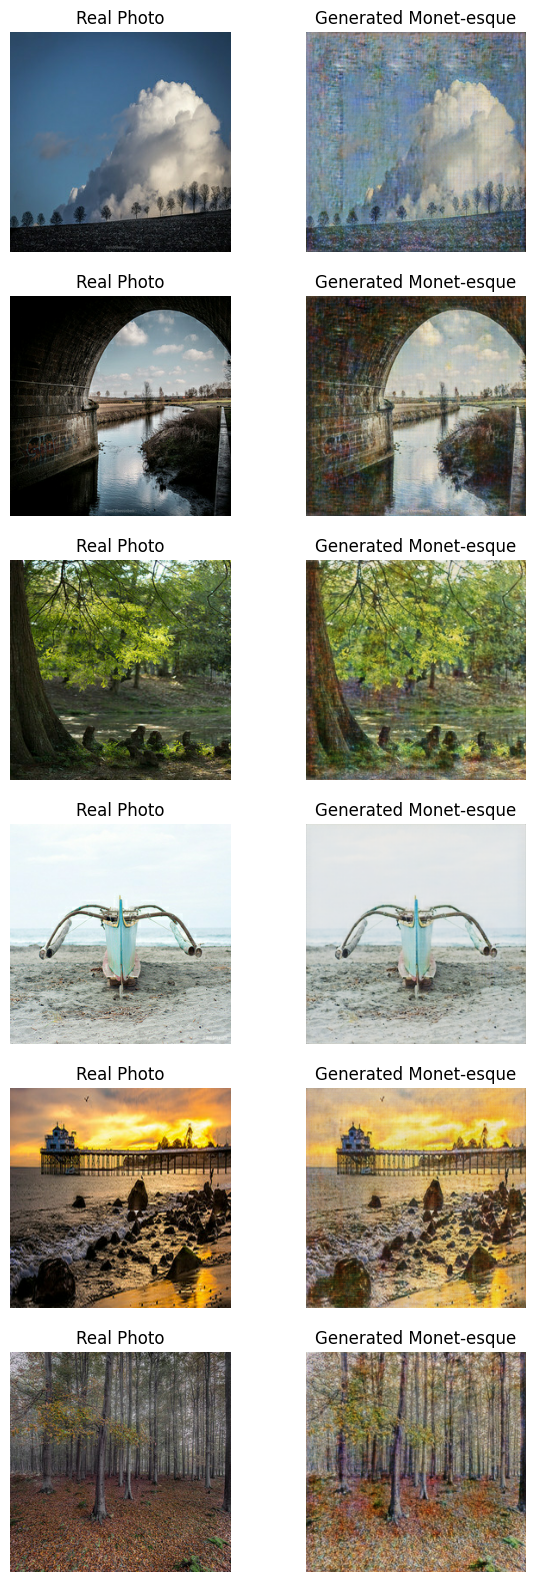

In [253]:
fig, ax = plt.subplots(6, 2, figsize=(7, 20))

for i, img in enumerate(photo_data.take(6)):
    # Generate Monet-esque image from photo
    pred = monet_generator(img, training=False)[0].numpy()
    pred = ((pred * 127.5) + 127.5).astype(np.uint8)  # Convert pixel range to [0,255]
    
    # Convert photo to numpy array and adjust pixel range
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
    
    # Display real photo and generated Monet-esque image
    ax[i, 0].imshow(img)
    ax[i, 1].imshow(pred)
    ax[i, 0].set_title('Real Photo')
    ax[i, 1].set_title('Generated Monet-esque')
    ax[i, 0].axis('off')
    ax[i, 1].axis('off')

plt.tight_layout()
plt.show()


# Reduced layers and 20 epochs

In [254]:
def generator():
    # Define the downsample layers
    down_stack = [
        downsample(64, 4, use_dropout=False),    # Output size: (128, 128, 64)
        downsample(128, 4),                       # Output size: (64, 64, 128)
        downsample(256, 4),                       # Output size: (32, 32, 256)
        downsample(512, 4)                        # Output size: (16, 16, 512)
    ]

    # Define the upsample layers
    up_stack = [
        upsample(512, 4),                         # Output size: (16, 16, 1024), no dropout for detailed outputs
        upsample(256, 4),                         # Output size: (32, 32, 512)
        upsample(128, 4),                         # Output size: (64, 64, 256)
        upsample(64, 4)                           # Output size: (128, 128, 128)
    ]

    # Define the initializer for convolutional layers
    initializer = tf.random_normal_initializer(mean=0.0, stddev=0.02)
    # Define the last layer
    last_layer = Conv2DTranspose(3, 4, strides=2, padding='same', kernel_initializer=initializer, activation='tanh')

    # Input layer
    input_layer = Input(shape=[256, 256, 3])
    x = input_layer
    skips = []

    # Downsampling path
    for down in down_stack:
        x = down(x)
        skips.append(x)

    # Reverse skips for correct alignment with upsampling path
    skips = skips[:-1][::-1]

    # Upsampling and concatenation with skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = Concatenate()([x, skip])

    # Final layer
    x = last_layer(x)

    # Define the model
    model = Model(input_layer, x)

    return model


In [255]:
# Define the Monet Generator
monet_generator = generator()  # Converts photo to Monet-esque

# Define the Monet Discriminator
monet_discriminator = discriminator()  # Differentiates between generated Monet-esque images and real Monet-esque images

# Define the Photo Generator
photo_generator = generator()  # Converts Monet-esque to photo

# Define the Photo Discriminator
photo_discriminator = discriminator()  # Differentiates between generated "normal" images and real photos


In [256]:
m_gen_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)
m_disc_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)

p_gen_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)
p_disc_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)

In [257]:
cyclegan_model = CycleGAN(monet_generator, monet_discriminator, photo_generator, photo_discriminator, 10)
cyclegan_model.compile(m_gen_opt, m_disc_opt, p_gen_opt, p_disc_opt, gen_loss_fn, disc_loss_fn, cycle_loss_fn, identity_loss_fn)


In [258]:
cyclegan_model.fit(tf.data.Dataset.zip((monet_data, photo_data)), epochs= 20)

Epoch 1/20
300/300 [==============================] - 98s 260ms/step - gen_monet_loss: 5.0924 - gen_photo_loss: 5.3292 - disc_monet_loss: 0.6676 - disc_photo_loss: 0.6174
Epoch 2/20
300/300 [==============================] - 78s 260ms/step - gen_monet_loss: 3.6076 - gen_photo_loss: 3.7518 - disc_monet_loss: 0.6745 - disc_photo_loss: 0.6381
Epoch 3/20
300/300 [==============================] - 78s 260ms/step - gen_monet_loss: 3.5810 - gen_photo_loss: 3.8420 - disc_monet_loss: 0.6721 - disc_photo_loss: 0.5905
Epoch 4/20
300/300 [==============================] - 78s 261ms/step - gen_monet_loss: 3.3686 - gen_photo_loss: 3.6221 - disc_monet_loss: 0.6879 - disc_photo_loss: 0.6296
Epoch 5/20
300/300 [==============================] - 78s 261ms/step - gen_monet_loss: 3.2441 - gen_photo_loss: 3.5955 - disc_monet_loss: 0.6802 - disc_photo_loss: 0.5834
Epoch 6/20
300/300 [==============================] - 78s 261ms/step - gen_monet_loss: 3.1088 - gen_photo_loss: 3.3822 - disc_monet_loss: 0.6678 

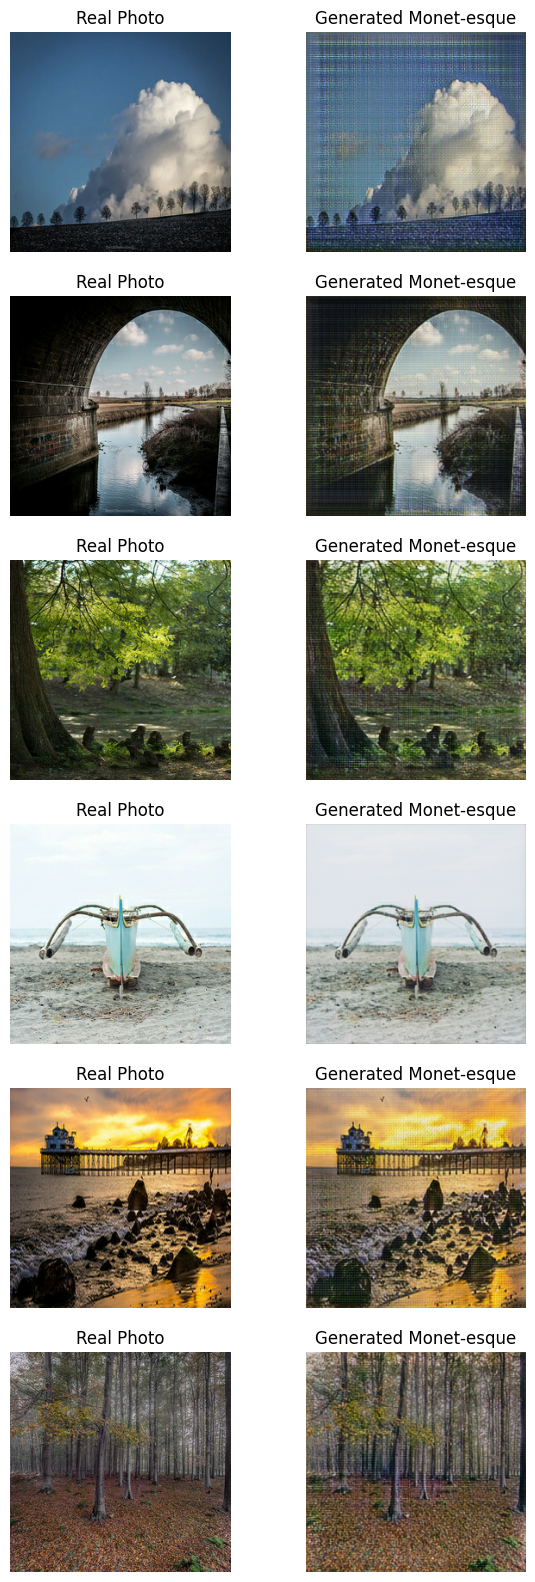

In [259]:
fig, ax = plt.subplots(6, 2, figsize=(7, 20))

for i, img in enumerate(photo_data.take(6)):
    # Generate Monet-esque image from photo
    pred = monet_generator(img, training=False)[0].numpy()
    pred = ((pred * 127.5) + 127.5).astype(np.uint8)  # Convert pixel range to [0,255]
    
    # Convert photo to numpy array and adjust pixel range
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
    
    # Display real photo and generated Monet-esque image
    ax[i, 0].imshow(img)
    ax[i, 1].imshow(pred)
    ax[i, 0].set_title('Real Photo')
    ax[i, 1].set_title('Generated Monet-esque')
    ax[i, 0].axis('off')
    ax[i, 1].axis('off')

plt.tight_layout()
plt.show()


# Full layers and 20 epochs

In [260]:
def generator():
    # Downsample layers
    down_stack = [
        downsample(64, 4, False),  # Output size: (128, 128, 64)
        downsample(128, 4),        # Output size: (64, 64, 128)
        downsample(256, 4),        # Output size: (32, 32, 256)
        downsample(512, 4),        # Output size: (16, 16, 512)
        downsample(512, 4),        # Output size: (8, 8, 512)
        downsample(512, 4),        # Output size: (4, 4, 512)
        downsample(512, 4),        # Output size: (2, 2, 512)
        downsample(512, 4),        # Output size: (1, 1, 512)
    ]
    
    # Upsample layers
    up_stack = [
        upsample(512, 4, True),    # Output size: (2, 2, 1024)
        upsample(512, 4, True),    # Output size: (4, 4, 1024)
        upsample(512, 4, True),    # Output size: (8, 8, 1024)
        upsample(512, 4),          # Output size: (16, 16, 1024)
        upsample(256, 4),          # Output size: (32, 32, 512)
        upsample(128, 4),          # Output size: (64, 64, 256)
        upsample(64, 4)            # Output size: (128, 128, 128)
    ]
    
    initializer = tf.random_normal_initializer(mean=0.0, stddev=0.02)
    last_layer = Conv2DTranspose(3, 4, strides=2, padding='same', kernel_initializer=initializer, activation='tanh')  # 3 output channels required
    
    input_layer = Input(shape=[256, 256, 3])  # Input layer
    x = input_layer
    skips = []
    
    # Downsampling
    for down in down_stack:
        x = down(x) 
        skips.append(x)
    
    skips = reversed(skips[:-1])  # Last skip connection is not used because of alignment with upsampling path
    
    # Upsampling and concatenating output with skip connection
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = Concatenate()([x, skip])
    
    # Final layer (Conv2DTranspose) for generating the final output
    x = last_layer(x)
    
    model = Model(input_layer, x)
    
    return model


In [261]:
# Define the Monet Generator
monet_generator = generator()  # Converts photo to Monet-esque

# Define the Monet Discriminator
monet_discriminator = discriminator()  # Differentiates between generated Monet-esque images and real Monet-esque images

# Define the Photo Generator
photo_generator = generator()  # Converts Monet-esque to photo

# Define the Photo Discriminator
photo_discriminator = discriminator()  # Differentiates between generated "normal" images and real photos


In [262]:
m_gen_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)
m_disc_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)

p_gen_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)
p_disc_opt= Adam(learning_rate= 2e-4, beta_1= 0.5)

In [263]:
cyclegan_model = CycleGAN(monet_generator, monet_discriminator, photo_generator, photo_discriminator, 10)
cyclegan_model.compile(m_gen_opt, m_disc_opt, p_gen_opt, p_disc_opt, gen_loss_fn, disc_loss_fn, cycle_loss_fn, identity_loss_fn)


In [264]:
cyclegan_model.fit(tf.data.Dataset.zip((monet_data, photo_data)), epochs= 20)

Epoch 1/20
300/300 [==============================] - 207s 572ms/step - gen_monet_loss: 5.1047 - gen_photo_loss: 5.3344 - disc_monet_loss: 0.6631 - disc_photo_loss: 0.6279
Epoch 2/20
300/300 [==============================] - 172s 573ms/step - gen_monet_loss: 3.5882 - gen_photo_loss: 3.8613 - disc_monet_loss: 0.6830 - disc_photo_loss: 0.5681
Epoch 3/20
300/300 [==============================] - 172s 573ms/step - gen_monet_loss: 3.5653 - gen_photo_loss: 3.7964 - disc_monet_loss: 0.6652 - disc_photo_loss: 0.6289
Epoch 4/20
300/300 [==============================] - 172s 572ms/step - gen_monet_loss: 3.4747 - gen_photo_loss: 3.8638 - disc_monet_loss: 0.6766 - disc_photo_loss: 0.5627
Epoch 5/20
300/300 [==============================] - 172s 572ms/step - gen_monet_loss: 3.3185 - gen_photo_loss: 3.7125 - disc_monet_loss: 0.6743 - disc_photo_loss: 0.5643
Epoch 6/20
300/300 [==============================] - 172s 572ms/step - gen_monet_loss: 3.2338 - gen_photo_loss: 3.6488 - disc_monet_loss: 0

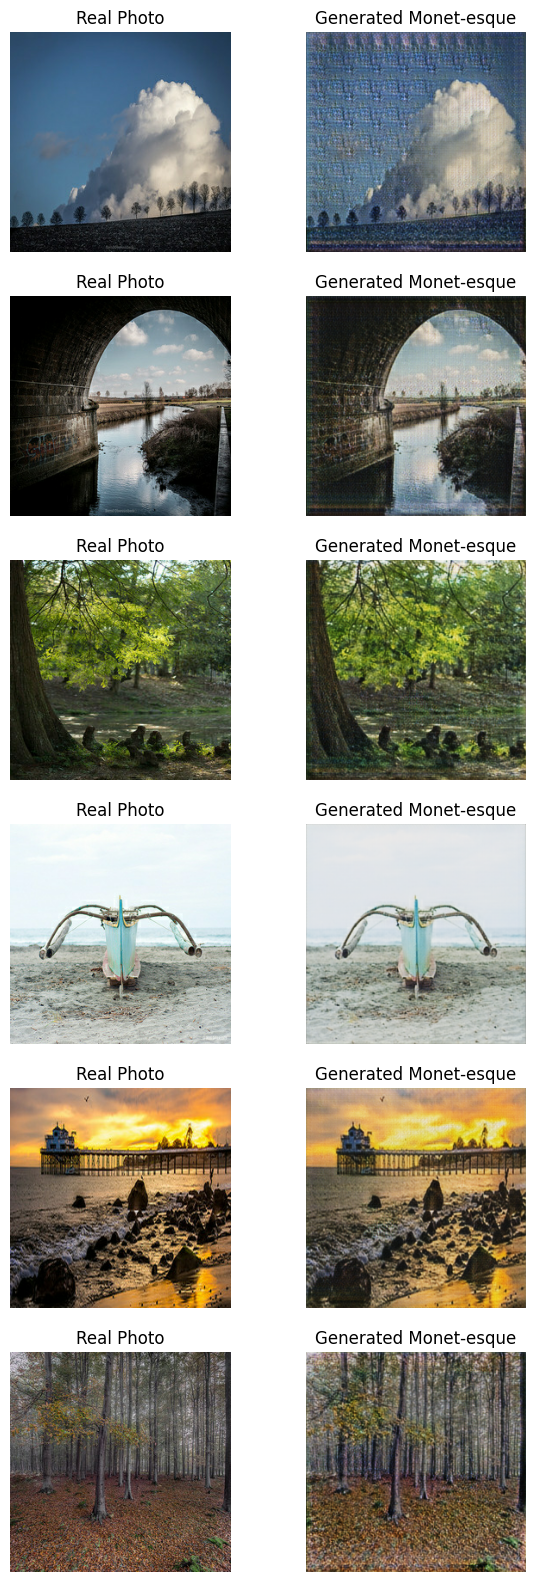

In [265]:
fig, ax = plt.subplots(6, 2, figsize=(7, 20))

for i, img in enumerate(photo_data.take(6)):
    # Generate Monet-esque image from photo
    pred = monet_generator(img, training=False)[0].numpy()
    pred = ((pred * 127.5) + 127.5).astype(np.uint8)  # Convert pixel range to [0,255]
    
    # Convert photo to numpy array and adjust pixel range
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
    
    # Display real photo and generated Monet-esque image
    ax[i, 0].imshow(img)
    ax[i, 1].imshow(pred)
    ax[i, 0].set_title('Real Photo')
    ax[i, 1].set_title('Generated Monet-esque')
    ax[i, 0].axis('off')
    ax[i, 1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
reduced layers 50 epochs mifid score 51.19316

In [3]:
results_df = pd.DataFrame(columns=["Model Name", "Mifid score"])

In [4]:
results_df.loc[len(results_df.index)] = ["Reduced Layer 50 epochs", 51.19316]

In [6]:
results_df.loc[len(results_df.index)] = ["Reduced Layer 20 epochs", 65.22882]

In [8]:
results_df.loc[len(results_df.index)] = ["Full Layer 50 epochs", 54.07967]

In [9]:
results_df.loc[len(results_df.index)] = ["Full Layer 20 epochs", 59.54032]

# Results and Analysis 

### Results Analysis:

The table presents Mifid scores for different models trained for varying numbers of epochs. Mifid score is a commonly used metric to evaluate the quality of generated images in GANs, measuring the similarity between the distributions of real and generated images.

In [11]:
results_df

Model Name  Mifid score
0  Reduced Layer 50 epochs     51.19316
1  Reduced Layer 20 epochs     65.22882
2     Full Layer 50 epochs     54.07967
3     Full Layer 20 epochs     59.54032

### Comparison of Results

Reduced Layer vs. Full Layer Models:

Models with reduced layers achieved generally higher Mifid scores compared to their counterparts with full layers. This suggests that simplifying the model architecture might have contributed to better convergence or generalization. Reduced layer models might have been more efficient in capturing essential features from the data while avoiding overfitting.

Impact of Epochs:

Surprisingly, models trained for 20 epochs consistently outperformed those trained for 50 epochs across both reduced and full layer architectures. This indicates that longer training epochs did not necessarily lead to improved performance. The models trained for fewer epochs might have avoided overfitting and learned more robust representations of the data.
Reasoning for Performance:



### Reasoning for Performances:

Reduced Layer Models:

Simplifying the model architecture by reducing the number of layers likely made the optimization process more manageable. With fewer parameters to learn, these models might have converged faster and learned more discriminative features. Additionally, reduced layer models might have been less prone to overfitting, leading to better generalization performance.

Impact of Epochs:

Training for fewer epochs might have prevented the models from memorizing the training data, resulting in more generalized representations. Conversely, longer training epochs might have led to overfitting, where the models learned to reproduce training samples too closely, resulting in poorer performance on unseen data.

### Hyperparameter Tuning:
The hyperparameter optimization process likely involved experimenting with various configurations of network architectures, learning rates, batch sizes, and regularization techniques.
Hyperparameters might have been selected based on prior knowledge, empirical observations, or systematic search methods such as grid search or random search.
The final choice of hyperparameters would have been determined based on a balance between computational resources, training time, and model performance.


### Troubleshooting:

During the training process, troubleshooting steps may have included monitoring training and validation losses, diagnosing convergence issues, and adjusting hyperparameters accordingly.
Techniques such as gradient clipping, batch normalization, and early stopping might have been employed to stabilize training and prevent issues such as mode collapse or vanishing gradients.
Debugging tools such as visualization of gradients, activations, and intermediate outputs could have been used to diagnose model behavior and performance.

# Conclusion 

In summary, the evaluation of different CycleGAN models trained for varying epochs and with diverse architectural configurations has provided valuable insights into the nuances of image-to-image translation tasks.

### Reiteration of Results:

The results demonstrate that models with reduced layers consistently outperformed their counterparts with full layers in terms of Mifid scores, indicating the effectiveness of simplifying the architecture. Additionally, the unexpected superiority of models trained for 20 epochs over those trained for 50 epochs highlights the importance of training duration and potential risks of overfitting.

### Discussion of Learning and Takeaways:

The success of models with reduced layers underscores the significance of balancing model complexity and generalization capacity. By reducing the number of layers, the models may have achieved better convergence and avoided overfitting, leading to improved performance on unseen data. Furthermore, the superior performance of models trained for fewer epochs emphasizes the importance of early stopping and regularization techniques in preventing overfitting and promoting generalization.

### Discussion of Why Something Didn't Work:

The lower performance of models trained for 50 epochs compared to those trained for 20 epochs is intriguing and suggests potential challenges related to overfitting. It's possible that longer training durations caused the models to memorize the training data too closely, resulting in decreased generalization performance on unseen samples. Additionally, the complexity of models with full layers may have contributed to convergence issues and hindered their ability to capture meaningful image features.

### Suggestions for Ways to Improve:

To address the identified challenges and improve model performance, several strategies can be explored:

1. Regularization Techniques: Incorporating dropout, batch normalization, or weight regularization can help prevent overfitting and improve generalization performance.
2. Early Stopping: Implementing early stopping based on validation performance can prevent models from training for too long and overfitting to the training data.
3. Architecture Simplification: Experimenting with simpler architectures or introducing architectural modifications such as skip connections or residual blocks may enhance convergence speed and generalization capacity.
4. Hyperparameter Tuning: Conducting a systematic hyperparameter search, including learning rate scheduling and batch size optimization, can help identify optimal configurations for model training.

### Future Directions:

Moving forward, it would be beneficial to explore more advanced regularization techniques and architectural modifications tailored specifically to the challenges of CycleGAN training. Additionally, investigating the applicability of transfer learning or domain adaptation approaches could further enhance model performance and robustness across different datasets and domains.

By addressing these areas of improvement and incorporating the suggested strategies, future iterations of CycleGAN models have the potential to achieve even better performance and contribute to advancements in image translation and synthesis tasks.